<a href="https://colab.research.google.com/github/wagnerfilho1995/Generator-Manchester-Classification/blob/main/DadosTriagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A maioria (56,43%) dos pacientes era do sexo feminino


In [ ]:
import pandas as pd
import random

# Inicialize um dicionario que sera usado para converter em df no final do
# processo.

dict_pessoas = {
  'Sex': []
}

num_pessoas = 10000

sexos = ['F', 'M']

qtd_feminino = int(0.56 * num_pessoas)
qtd_masculino = int(0.44 * num_pessoas)

for i in range(qtd_feminino):
  dict_pessoas['Sex'].append('F')

for i in range(qtd_masculino):
  dict_pessoas['Sex'].append('M')

random.shuffle(dict_pessoas['Sex'])

print(dict_pessoas['Sex'][:10])

['F', 'M', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'F']


A idade variou entre 0 e 112 anos
(média: 53,65 + 21,18 dp)

In [ ]:
import matplotlib.pyplot as plt
import random
from numpy.random import seed
from numpy.random import randn
from datetime import date, datetime

# seed random number generator
seed(1)

# generate some Gaussian values
values = randn(num_pessoas)

dict_pessoas['Data_nascimento'] = []

for val in values: 
  scaled_value = int(53.65 + val * 21.18)
  mes = random.randint(1, 12)
  dia = random.randint(1, 29)
  if mes == 2 and dia > 28:
    dia = 28
  ano = datetime.now().year - scaled_value
  data_nascimento = date(ano, mes, dia)
  dict_pessoas['Data_nascimento'].append(data_nascimento)

print(dict_pessoas['Data_nascimento'][:10])


[datetime.date(1933, 12, 21), datetime.date(1981, 5, 10), datetime.date(1979, 1, 21), datetime.date(1991, 4, 4), datetime.date(1950, 4, 27), datetime.date(2017, 1, 15), datetime.date(1931, 2, 11), datetime.date(1984, 7, 21), datetime.date(1961, 5, 9), datetime.date(1973, 6, 6)]


Counter({'yellow': 5471, 'green': 2871, 'orange': 998, 'blue': 635, 'red': 25})


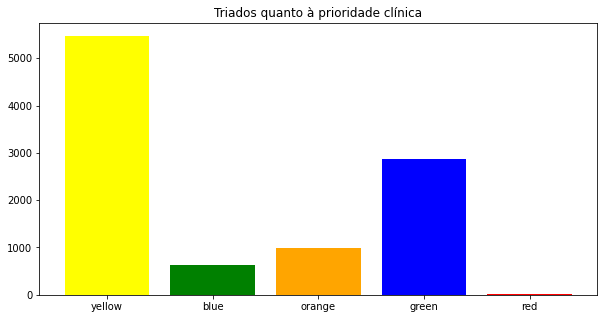

In [ ]:
from numpy.random import randn
import numpy as np

prioridade = ['Não urgente', 'Pouco urgente', 'Urgente', 'Muito urgente', 'Emergencia']

dict_pessoas['manchester'] = np.random.choice(
  ['blue', 'green', 'yellow', 'orange', 'red'], 
  num_pessoas,
  p=[0.0654, 0.2916, 0.5421, 0.0985, 0.0024]
)

import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

data = Counter(dict_pessoas['manchester'])

print(data)

cores = list(data.keys())
numero_classificacoes = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(cores, numero_classificacoes, color=['yellow', 'green', 'orange', 'blue', 'red'])

plt.title("Triados quanto à prioridade clínica")
plt.show()

In [ ]:
from numpy.random import seed
from numpy.random import randn

sinais_vitais = {
    'red': {
        'temperatura': [36.42, 1.30],
        'frequencia_respiratoria': [25.70, 9.60], 
        'frequencia_cardiaca': [160.74, 132.61], 
        'glicemia_capilar': [252.08, 266.25],
        'pressao_sistolica': [152.48, 54.35]
    },
    'orange': {
        'temperatura': [36.85, 1.21],
        'frequencia_respiratoria': [24.58, 9.39], 
        'frequencia_cardiaca': [93.17,42.53], 
        'glicemia_capilar': [193.89, 168.40],
        'pressao_sistolica': [125.88, 28.87]
    },
    'yellow': {
        'temperatura': [36.63, 0.78],
        'frequencia_respiratoria': [22.93, 8.58], 
        'frequencia_cardiaca': [86.24, 19.74], 
        'glicemia_capilar': [149.39, 102.87],
        'pressao_sistolica': [125.15, 20.52]
    },
    'green': {
        'temperatura': [36.53, 0.57],
        'frequencia_respiratoria': [21.32, 8.07], 
        'frequencia_cardiaca': [84.45, 17.22], 
        'glicemia_capilar': [151.31, 85.23],
        'pressao_sistolica': [121.69, 17.64]
    },
    'blue': {
        'temperatura': [36.53, 0.57],
        'frequencia_respiratoria': [21.32, 8.07], 
        'frequencia_cardiaca': [84.45, 17.22], 
        'glicemia_capilar': [151.31, 85.23],
        'pressao_sistolica': [121.69, 17.64]
    },
}

dict_pessoas['Temperatura (°C)'] = []
dict_pessoas['Frequencia_respiratoria (irpm)'] = []
dict_pessoas['Frequencia_cardiaca (bpm)'] = []
dict_pessoas['Glicemia_capilar (mg/dl)'] = []
dict_pessoas['Pressao_sistolica (mmHg)'] = []

dict_pessoas['Prioridade'] = []
dict_pessoas['Espera (mins)'] = []

prioridade = ['Não urgente', 'Pouco urgente', 'Urgente', 'Muito urgente', 'Emergencia']
espera = [240, 120, 50, 10, 0]
i = 0
for cor in dict_pessoas['manchester']:
  # temperatura
  c = sinais_vitais[cor]['temperatura'][0] + values[i] * sinais_vitais[cor]['temperatura'][1]
  dict_pessoas['Temperatura (°C)'].append(round(c, 2))

  # frequencia_respiratoria
  irpm = sinais_vitais[cor]['frequencia_respiratoria'][0] + values[i] * sinais_vitais[cor]['frequencia_respiratoria'][1]
  dict_pessoas['Frequencia_respiratoria (irpm)'].append(round(irpm, 2))

  # frequencia_cardiaca
  bpm = sinais_vitais[cor]['frequencia_cardiaca'][0] + values[i] * sinais_vitais[cor]['frequencia_cardiaca'][1]
  dict_pessoas['Frequencia_cardiaca (bpm)'].append(round(bpm, 2))

  # glicemia_capilar
  mgdl = sinais_vitais[cor]['glicemia_capilar'][0] + values[i] * sinais_vitais[cor]['glicemia_capilar'][1]
  dict_pessoas['Glicemia_capilar (mg/dl)'].append(round(mgdl, 2))

  # pressao_sistolica
  mmhg = sinais_vitais[cor]['pressao_sistolica'][0] + values[i] * sinais_vitais[cor]['pressao_sistolica'][1]
  dict_pessoas['Pressao_sistolica (mmHg)'].append(round(mmhg, 2))

  i += 1

  if cor == 'blue':
    dict_pessoas['Prioridade'].append(prioridade[0])
    dict_pessoas['Espera (mins)'].append(espera[0])
  elif cor == 'green':
    dict_pessoas['Prioridade'].append(prioridade[1])
    dict_pessoas['Espera (mins)'].append(espera[1])
  elif cor == 'yellow':
    dict_pessoas['Prioridade'].append(prioridade[2])
    dict_pessoas['Espera (mins)'].append(espera[2])
  elif cor == 'orange':
    dict_pessoas['Prioridade'].append(prioridade[3])
    dict_pessoas['Espera (mins)'].append(espera[3])
  elif cor == 'red':
    dict_pessoas['Prioridade'].append(prioridade[4])
    dict_pessoas['Espera (mins)'].append(espera[4])

In [ ]:
# FORMATO NUMERO DO SUS
sus = '000 0000 0000 0000'

dict_pessoas['SUS'] = []

for i in range(num_pessoas):
  
  meu_sus = ''
  # bloco de 3 digitos
  bloco = np.random.choice(
    ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 
    3,
    p=[0.5, 0.1, 0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0]
  )
  meu_sus += ''.join(bloco)
  meu_sus += ' '
  for j in range(3):
    # blocos de 4 digitos
    bloco = np.random.choice(
      ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 
      4,
      p=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
    )
    meu_sus += ''.join(bloco)
    meu_sus += ' '
  dict_pessoas['SUS'].append(meu_sus)

print(dict_pessoas['SUS'][:10])

['020 6625 8350 5373 ', '115 3717 3311 4856 ', '332 1454 7231 4556 ', '000 3457 3985 4937 ', '040 7144 4235 7258 ', '000 4463 2152 6776 ', '000 5649 5261 1291 ', '420 3489 2494 8546 ', '000 1596 0333 5269 ', '030 1631 5189 2638 ']


In [ ]:
  # Convert to dataframe
df = pd.DataFrame(dict_pessoas)

df_corr = df[['Temperatura (°C)', 'Frequencia_respiratoria (irpm)', 'Frequencia_cardiaca (bpm)',	'Glicemia_capilar (mg/dl)', 'Pressao_sistolica (mmHg)', 'Espera (mins)']]

df

,Sex,Data_nascimento,manchester,Temperatura (°C),Frequencia_respiratoria (irpm),Frequencia_cardiaca (bpm),Glicemia_capilar (mg/dl),Pressao_sistolica (mmHg),Prioridade,Espera (mins),SUS
0,F,1933-12-21,yellow,37.90,36.87,118.30,316.49,158.48,Urgente,50,020 6625 8350 5373
1,M,1981-05-10,blue,36.18,16.38,73.92,99.17,110.90,Não urgente,240,115 3717 3311 4856
2,F,1979-01-21,orange,36.21,19.62,70.71,104.95,110.63,Muito urgente,10,332 1454 7231 4556
3,F,1991-04-04,green,35.92,12.66,65.97,59.86,102.76,Pouco urgente,120,000 3457 3985 4937
4,M,1950-04-27,green,37.02,28.30,99.35,225.07,136.96,Pouco urgente,120,040 7144 4235 7258
...,...,...,...,...,...,...,...,...,...,...,...
9995,M,1966-05-12,green,36.57,21.91,85.71,157.53,122.98,Pouco urgente,120,402 8956 8072 9157
9996,F,1957-12-29,yellow,37.01,27.13,95.89,199.70,135.19,Urgente,50,520 2218 2724 1048
9997,F,1989-07-07,green,35.95,13.14,66.99,64.87,103.80,Pouco urgente,120,200 3565 7347 2099
9998,M,1969-04-19,blue,36.49,20.81,83.37,145.97,120.58,Não urgente,240,042 3567 0449 7774


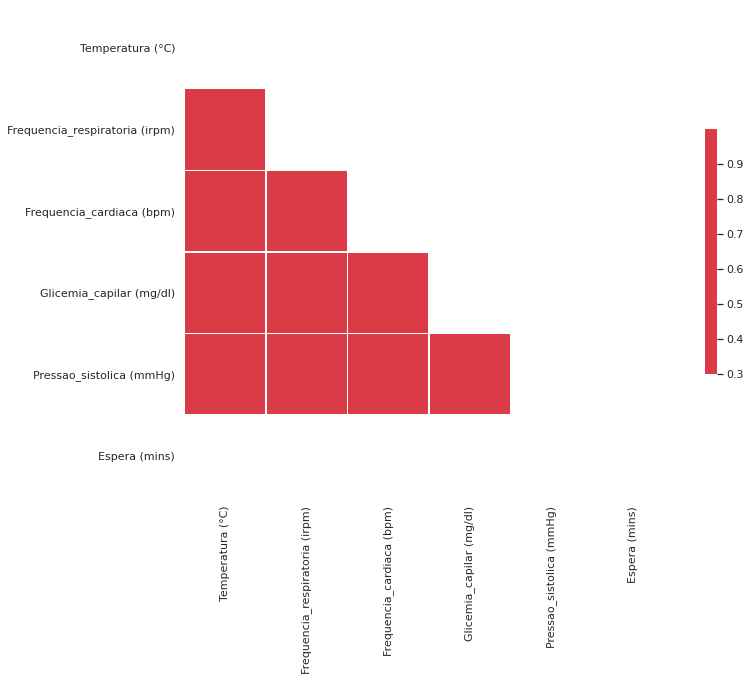

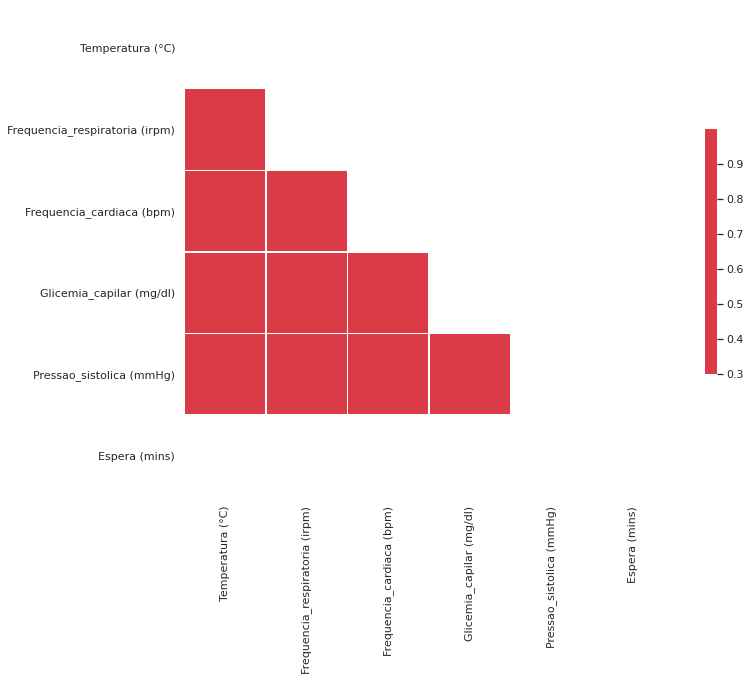

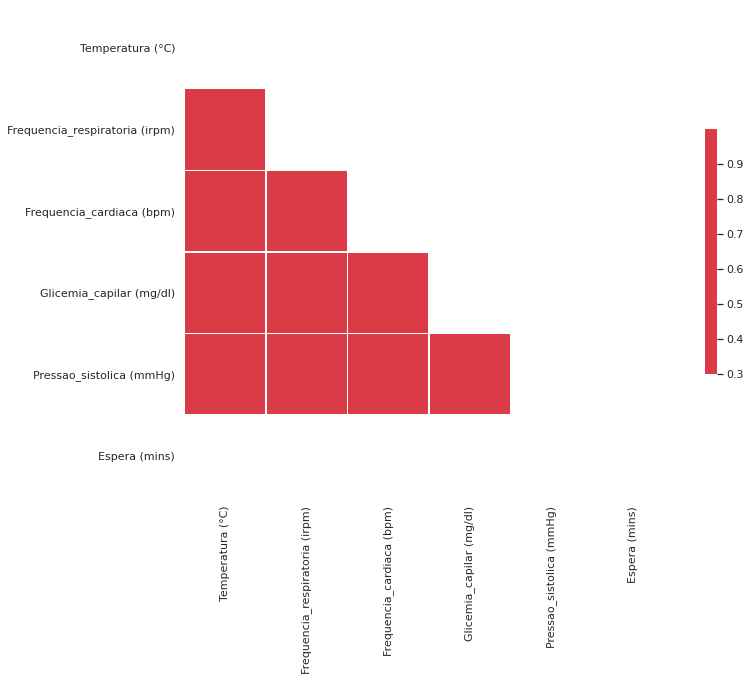

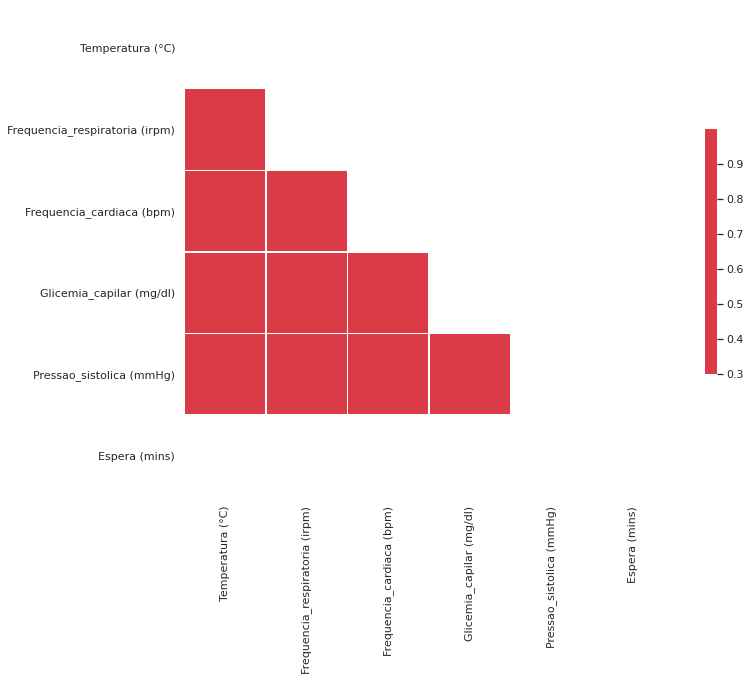

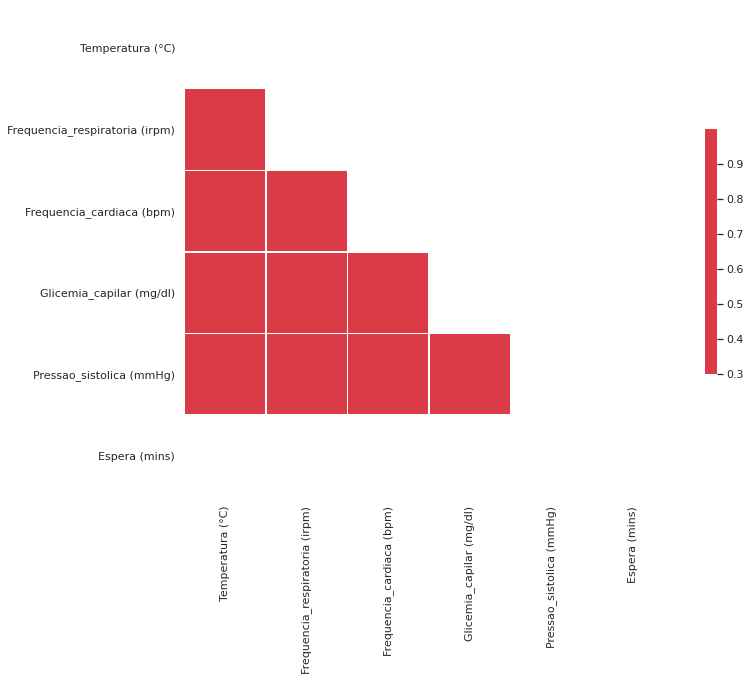

In [ ]:
import seaborn as sns
for i, corr_espera in df_corr.groupby('Espera (mins)'):
  corr = corr_espera.corr()

  sns.set(style="white")

  # Generate a mask for the upper triangle
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True

  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(11, 9))

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})
  

In [ ]:
# determining the name of the file
file_name = 'TriagemData.xlsx'
  
# saving the excel
df.to_excel(file_name)